# MATTE package Quick Start

## Description

MATTE (Module Alignment of TranscripTomE) is a python package aiming to analysis transcriptome from samples with different phenotypes in a module view. Differiential expression (DE) is commonly used in analysing transcriptome data. But genes are not work alone, they collaborate. Network and module based differential methods are developed in recent years to obtain more information. New problems appears that how to make sure module or network structure is preserved in all of the phenotypes. To that end, we proposed MATTE to find the conserved module and diverged module by treating genes from different phenotypes as individual ones. By doing so, meaningful markers and modules can be found to better understand what's really difference between phenotypes.


**Advantages**

In the first place, MATTE merges the data from phenotypes, seeing genes from different phenotypes as new analyzing unite. By doing so, benefits got as follows:

1. MATTE considering the information in phenotypes in the preprocessing stage, hoping to find more interesting conclusion.
2. MATTE is actually making transcriptome analysis includes the relationship between phenotypes, which is of significance in cancer or other complex phenotypes.
3. MATTE can deal with more noise thanks to calculation of relative different expression (RDE) and ignore some of batch effect.
4. In a module view, "Markers" can be easily transfer to other case but not over fits compare to in a gene view.
5. The result of MATTE can be easily analysed. 


## Install
Install from pip is recommended.
```
pip install MATTE
```

## Genes' Clustering
1. Preprocess
2. CLustering
3. Analysis

### Pipeline

In [1]:
import MATTE
print(MATTE.__version__)
## init with default settings
pipeline = MATTE.AlignPipe(init=True)
## Showing the Pipe composition
pipeline

1.1.1


MATTE calculation pipeline
## STEP 0 	<PipeFunc> inputs_check()
## STEP 1 	<PipeFunc> RPKM2TPM()
## STEP 2 	<PipeFunc> log2transform()
## STEP 3 	<PipeFunc> exp_filter(gene_filter=None)
## STEP 4 	<PipeFunc> Kernel_transform(kernel_type='mean',centering_kernel=True,outer_subtract_absolute=True,double_centering=True)
## STEP 5 	PCA(n_components=16)
## STEP 6 	<PipeFunc> adding_weights()
## CLUSTER STEP 0 	<PipeFunc> CrossCluster()
## CLUSTER STEP 1 	<PipeFunc> build_results()

In [2]:
## In TenaPipe stores some functions (PipeFunc type)
pipeline.funcs,pipeline.cluster_func

([<PipeFunc> inputs_check(),
  <PipeFunc> RPKM2TPM(),
  <PipeFunc> log2transform(),
  <PipeFunc> exp_filter(gene_filter=None),
  <PipeFunc> Kernel_transform(kernel_type='mean',centering_kernel=True,outer_subtract_absolute=True,double_centering=True),
  PCA(n_components=16),
  <PipeFunc> adding_weights()],
 [<PipeFunc> CrossCluster(), <PipeFunc> build_results()])

In [3]:
## Running the test.(data is generated randomly)
R,data = MATTE.package_test(n_genes=1000,pipe=pipeline,verbose=False)

In [ ]:
# basic usage
R = pipeline.calculate(df_exp=data['df_exp'],df_pheno=data['df_pheno'])

### Inputs

In [ ]:
## Standard inputs
data['df_exp']

,sample0,sample3,sample4,sample5,sample8,sample10,sample13,sample14,sample16,sample19,...,sample86,sample87,sample88,sample90,sample92,sample93,sample95,sample96,sample98,sample99
gene0,2068.782009,2074.743627,2358.613186,2214.779271,2615.754304,2416.816078,2324.006712,2568.534221,1790.074733,2156.944223,...,699.020783,408.182918,13.719141,614.162325,242.881932,537.560430,640.396277,71.989106,15.671641,121.134253
gene1,1736.262834,1102.800776,1202.438027,1846.884467,1004.449435,1161.452514,1267.909764,1432.889514,1176.173534,633.488180,...,1426.345172,1447.027209,1606.243963,2253.905879,1643.103867,2278.306248,1456.288578,2015.417148,1947.948739,1425.494850
gene2,2014.528625,2398.080280,1944.729892,2316.274409,2131.565037,2298.541242,2531.612209,2596.111747,2413.634703,2207.004282,...,805.591423,937.059757,811.347534,819.525380,617.231009,660.709923,652.394533,823.183763,890.001682,982.703612
gene3,659.427115,163.787569,561.642612,378.384480,519.343153,19.082749,847.503441,381.925232,707.469305,276.173993,...,1487.512143,1086.595268,315.433694,1820.512500,1701.598813,1402.320642,1623.801592,1282.006193,1237.460095,862.684200
gene4,557.430594,391.416889,842.972964,675.541378,850.962173,811.020469,986.334022,1345.391218,1264.336918,1136.040696,...,492.540540,1170.198803,637.125151,83.639511,846.553239,718.903346,285.646841,68.010063,426.350989,523.634085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene995,1079.554741,1256.576785,371.790347,1552.897702,837.588520,781.422702,1410.911788,280.789440,1074.169879,891.334274,...,914.248736,1039.659511,1424.090367,1528.602309,1048.966685,1217.551321,1595.634636,892.179251,733.385461,1326.974023
gene996,1466.756618,682.381925,655.547941,1217.328283,1027.033929,743.552669,1303.702866,156.088532,1100.372258,1653.174072,...,171.781193,409.069384,1064.053578,409.015074,1108.110725,522.949709,1141.158675,807.635314,650.720516,935.940121
gene997,2667.592315,2705.673085,2692.679566,2451.598273,2265.107811,1688.030061,3214.672455,2487.450931,3213.472788,1963.800244,...,2788.161130,2177.646822,1659.035894,1952.969200,2790.787782,2053.803419,2259.536840,2437.241921,1967.708017,2296.309486
gene998,201.558856,400.279793,812.383524,262.929812,671.040851,580.943332,343.901157,476.913661,667.557218,168.932862,...,621.693365,832.883736,1035.085086,512.018102,722.357924,507.593183,608.552576,169.301006,612.163599,186.982519


In [ ]:
data['df_pheno']

sample0     P0
sample1     P1
sample2     P1
sample3     P0
sample4     P0
            ..
sample95    P1
sample96    P1
sample97    P0
sample98    P1
sample99    P1
Length: 100, dtype: object

### Clustering Results

In [4]:
R.cluster_properties

{'error': 23.744632494143193,
 'method': 'kmeans_a',
 'dist_type': 'a',
 'n_clusters': 8,
 'npass': 20,
 'score': 5099.612952032368,
 'Process': "MATTE calculation pipeline\n## STEP 0 \t<PipeFunc> inputs_check()\n## STEP 1 \t<PipeFunc> RPKM2TPM()\n## STEP 2 \t<PipeFunc> log2transform()\n## STEP 3 \t<PipeFunc> exp_filter(gene_filter=None)\n## STEP 4 \t<PipeFunc> Kernel_transform(kernel_type='mean',centering_kernel=True,outer_subtract_absolute=True,double_centering=True)\n## STEP 5 \tPCA(n_components=16)\n## STEP 6 \t<PipeFunc> adding_weights()\n## CLUSTER STEP 0 \t<PipeFunc> CrossCluster()\n## CLUSTER STEP 1 \t<PipeFunc> build_results()\n"}

In [6]:
R.res

,P0,P1,matched
gene0,3,4,False
gene1,0,3,False
gene2,3,7,False
gene3,4,0,False
gene4,1,4,False
...,...,...,...
gene995,0,0,True
gene996,6,2,False
gene997,3,3,True
gene998,5,7,False


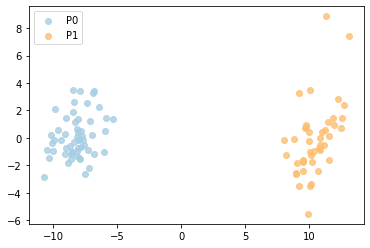

In [9]:
from MATTE.analysis import Fig_SampleFeature
sf = R.SampleFeature()
f = Fig_SampleFeature(sf,R.pheno)

In [11]:
R.ModuleSNR(sf)[0:5]

M3.4_0    5.639699
M4.3_0    4.175571
M0.3_0    3.417767
M3.7_0    3.283632
M5.3_0    3.222075
dtype: float64

## Embedder

Embedder is a buildin class that select key genes or embed data by module calculation.

In this step, multiple phenotypes can be received.

In [14]:
from MATTE import ModuleEmbedder
embedder = ModuleEmbedder(pipeline=pipeline)

In [17]:
gene_rank = embedder.gene_rank(X = data['df_exp'].T, y=data['df_pheno'])
gene_rank

round 0: P0 vs P1: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


There are 2 labels: ['P0' 'P1']


gene0      14.136113
gene1       6.884732
gene2       7.687132
gene3       6.754049
gene4       2.986378
             ...    
gene995     0.099898
gene996     0.000000
gene997     0.000000
gene998     0.095282
gene999     0.099898
Length: 1000, dtype: float64

## Module Analysis

# --- Number of genes:
Same Module Genes: 613
Different Module Genes: 387
# --- clustering score:
error 23.68317251501341
method kmeans_a
dist_type a
n_clusters 8
npass 20
score 9367.940233968568
Process MATTE calculation pipeline
## STEP 0 	<PipeFunc> inputs_check()
## STEP 1 	<PipeFunc> RPKM2TPM()
## STEP 2 	<PipeFunc> log2transform()
## STEP 3 	<PipeFunc> exp_filter(gene_filter=None)
## STEP 4 	<PipeFunc> Kernel_transform(kernel_type='mean',centering_kernel=True,outer_subtract_absolute=True,double_centering=True)
## STEP 5 	PCA(n_components=16)
## STEP 6 	<PipeFunc> adding_weights()
## CLUSTER STEP 0 	<PipeFunc> CrossCluster()
## CLUSTER STEP 1 	<PipeFunc> build_results()

# --- samples' distribution:


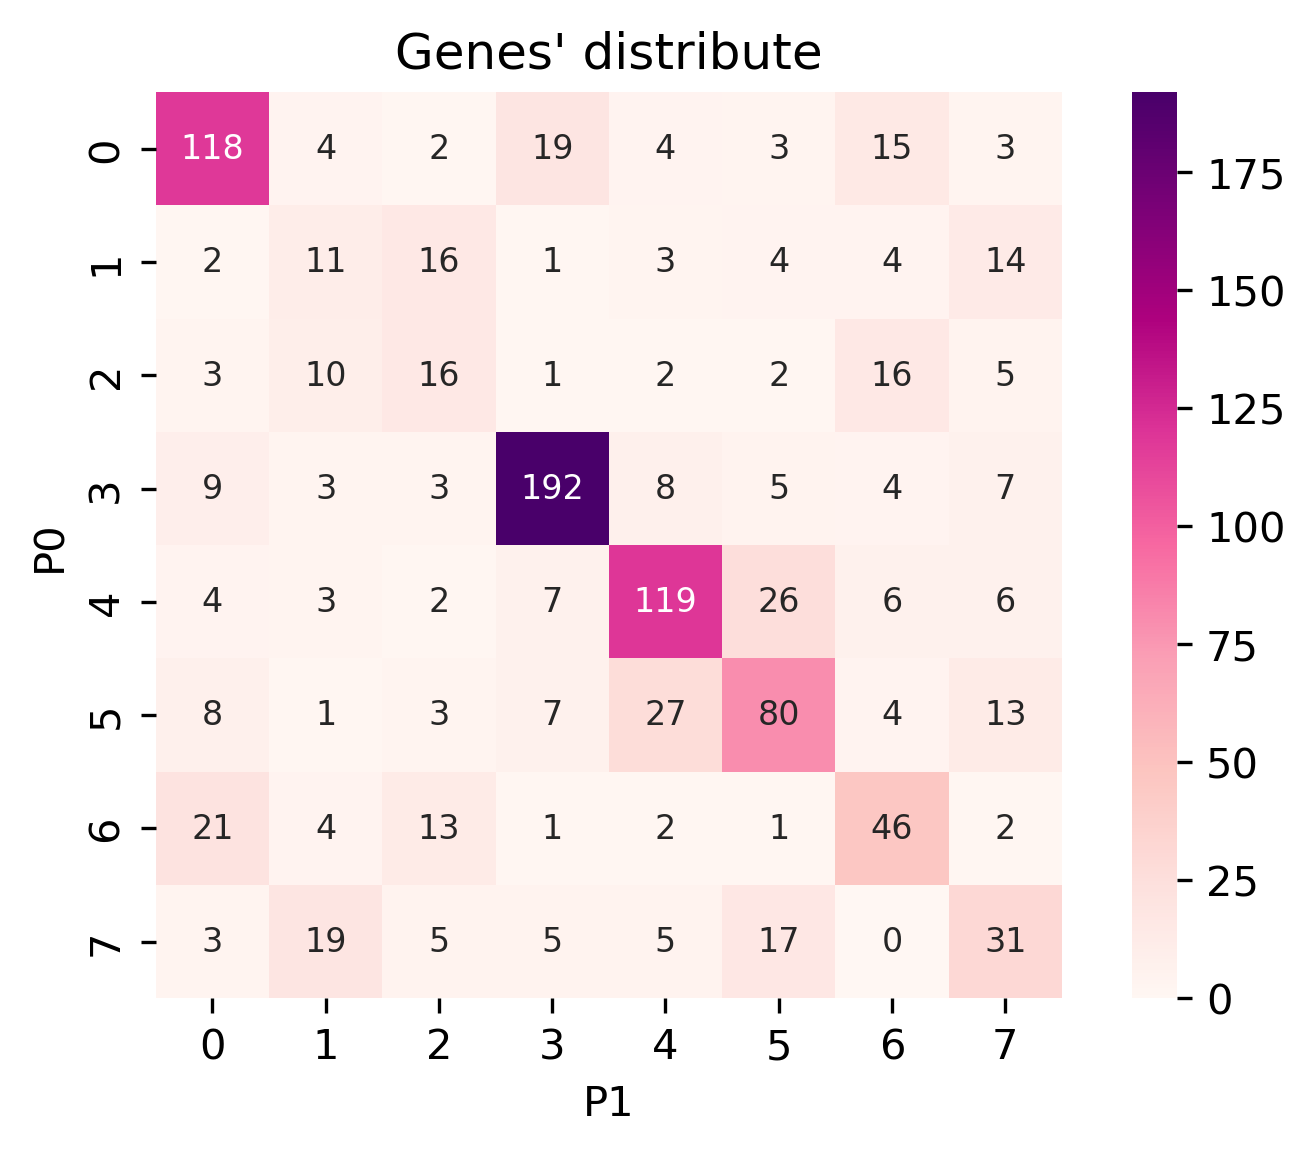

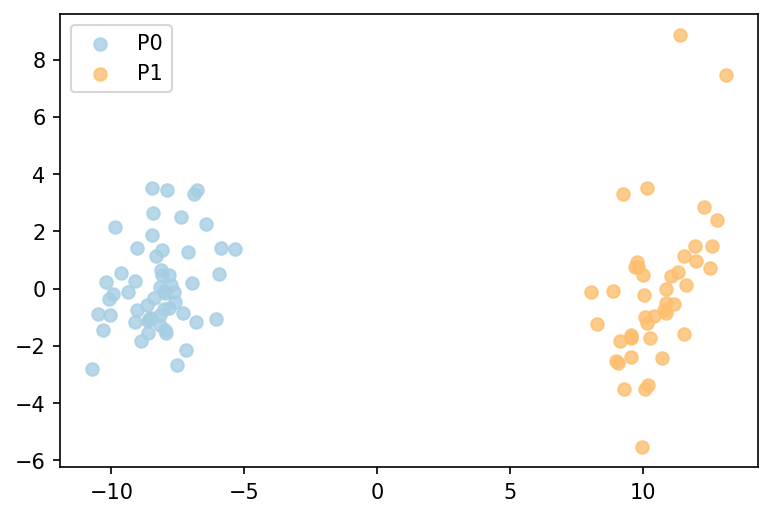

In [18]:
from TENA.analysis import Fig_SampleFeature

# Showing the Summary.
R.summary()
# two figures can be get by following:
if False:
    f1 = R.Vis_Jmat() # genes' distribution
    # Showing the samples' distribution
    
    sf = R.SampleFeature()
    f = Fig_SampleFeature(sf,labels=R.pheno,dpi=300,model=PCA())

### Function Analysis

Read go annote files.
File can be downloaded from https://ftp.ncbi.nih.gov/gene/DATA/

In [19]:
import pandas as pd
annote_file = pd.read_table("A:/Data/Annotation/gene2go")
annote_file = annote_file[annote_file["#tax_id"] == 9606]
def lst_change(lst,target,changed):
    ret = []
    for i in lst:
        if i == target:
            ret.append(changed)
        else:
            ret.append(i)
    return ret
## Change columns name.
annote_file.columns = lst_change(annote_file.columns,"GO_term","Term")
annote_file.columns = lst_change(annote_file.columns,"GO_ID","Term_ID")

In [28]:
## randomly select some genes
import numpy as np
from random import sample
unique_genes = np.unique(annote_file['GeneID'].values)
selected_genes = sample(unique_genes.tolist(),100)

The format of input files are following:

    gene_set     iteral object, containing gene id.
    annote_file  with columns ["Term_ID","GeneID","Term","Category"],and each row is an entry.

In [21]:
annote_file

,#tax_id,GeneID,Term_ID,Evidence,Qualifier,Term,PubMed,Category
640889,9606,1,GO:0003674,ND,enables,molecular_function,-,Function
640890,9606,1,GO:0005576,HDA,located_in,extracellular region,27068509,Component
640891,9606,1,GO:0005576,IDA,located_in,extracellular region,3458201,Component
640892,9606,1,GO:0005576,TAS,located_in,extracellular region,-,Component
640893,9606,1,GO:0005615,HDA,located_in,extracellular space,16502470,Component
...,...,...,...,...,...,...,...,...
971204,9606,118568804,GO:0004930,IEA,enables,G protein-coupled receptor activity,-,Function
971205,9606,118568804,GO:0004984,IEA,enables,olfactory receptor activity,-,Function
971206,9606,118568804,GO:0007186,IEA,involved_in,G protein-coupled receptor signaling pathway,-,Process
971207,9606,118568804,GO:0016021,IEA,located_in,integral component of membrane,-,Component


In [29]:
from TENA.analysis import FunctionEnrich
all_items,term_genes = FunctionEnrich(annote_file,selected_genes)

100%|██████████| 18684/18684 [02:06<00:00, 147.40it/s]


The function FunctionEnrich return two object:
    
    all_item    Terms with p_value, fdr and other information
    term_genes  each term enriches what genes

In [30]:
## Filtering the enriched results
target = all_items.groupby(by="Category").apply(lambda x: x.sort_values(by="p_value").iloc[0:5,:])
target.index= [i[1] for i in target.index]
target

,Term,Category,n_enriched,n_backgroud,p_value,fdr,gene_ratio
GO:0005685,U1 snRNP,Component,3,33,0.000538,0.94667,0.03
GO:0034709,methylosome,Component,2,12,0.001479,1.0,0.02
GO:0042627,chylomicron,Component,2,13,0.001743,1.0,0.02
GO:0034361,very-low-density lipoprotein particle,Component,2,20,0.004153,1.0,0.02
GO:0097453,mesaxon,Component,1,1,0.004834,1.0,0.01
GO:0004729,oxygen-dependent protoporphyrinogen oxidase ac...,Function,1,1,0.004834,1.0,0.01
GO:0061627,S-methylmethionine-homocysteine S-methyltransf...,Function,1,1,0.004834,1.0,0.01
GO:0032029,myosin tail binding,Function,1,1,0.004834,1.0,0.01
GO:0030742,GTP-dependent protein binding,Function,2,22,0.005018,1.0,0.02
GO:0004364,glutathione transferase activity,Function,2,28,0.008057,1.0,0.02


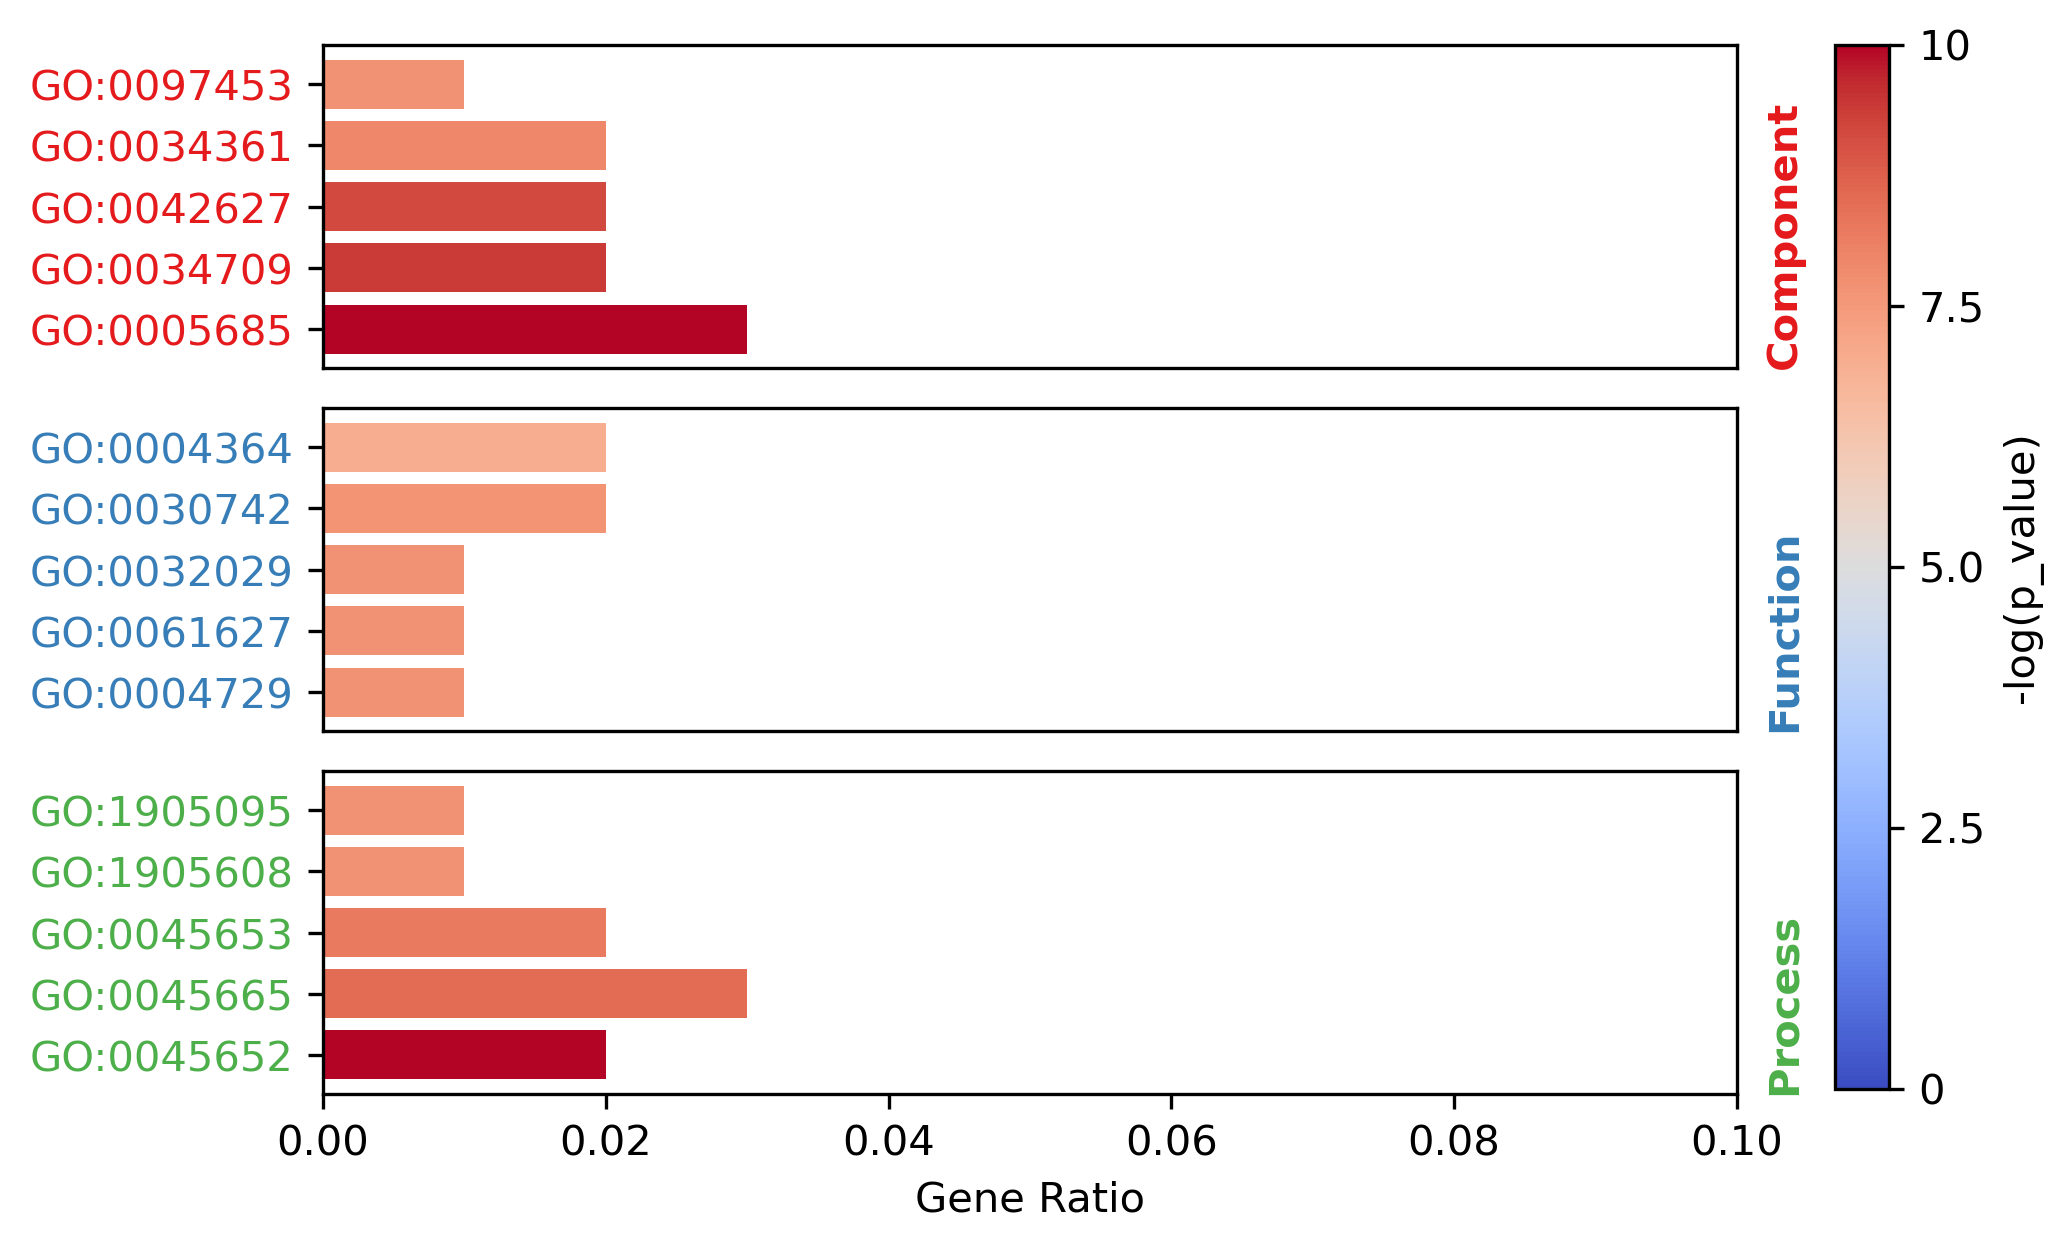

In [31]:
from TENA.analysis import Fig_Fuction
f = Fig_Fuction(target,"p_value",dpi=300)